In [1]:
import sys
sys.path.append("../../library/")
sys.path.append("../lib/")
import numpy as np
import matplotlib.pyplot as plt
import read_data as rd
from dataProcess import *
from stringFormat import *
from defaultPlot import *


In [2]:
clusterSizeDist = {}

In [5]:
size=160000
for prob in [0.4, 0.905, 0.99, 0.999, 0.9999]:
    current = size, prob
    clusterSizeDist[current] = rd.read("clusterSizeDist", size, prob)

Reading  ../data/clusterSizeDist/N1.6e+05,P0.40000,E10000-0.txt
Reading  ../data/clusterSizeDist/N1.6e+05,P0.90500,E10000-0.txt
Reading  ../data/clusterSizeDist/N1.6e+05,P0.99000,E10000-0.txt
Reading  ../data/clusterSizeDist/N1.6e+05,P0.99900,E10000-0.txt
Reading  ../data/clusterSizeDist/N1.6e+05,P0.99990,E10000-0.txt


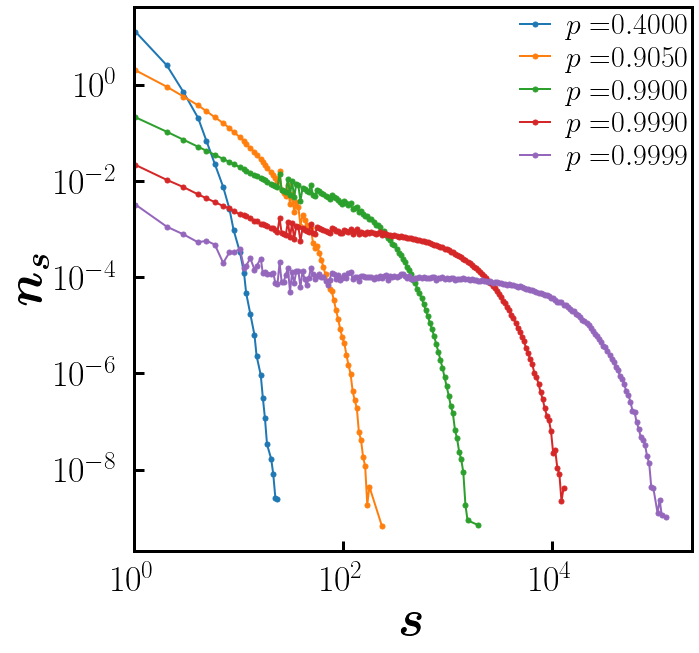

In [6]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotCSD(prob, label=None, color=None):
    current = size, prob
    csd, dist = distLogBin(*clusterSizeDist[current], delta_exponent=0.02)
    label_name = label if label else latex_string("p=") + latex_float(prob, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)

plotCSD(0.4)
plotCSD(0.905)
plotCSD(0.99)
plotCSD(0.999)
plotCSD(0.9999)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1)
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("n_s"))
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

fig.show()


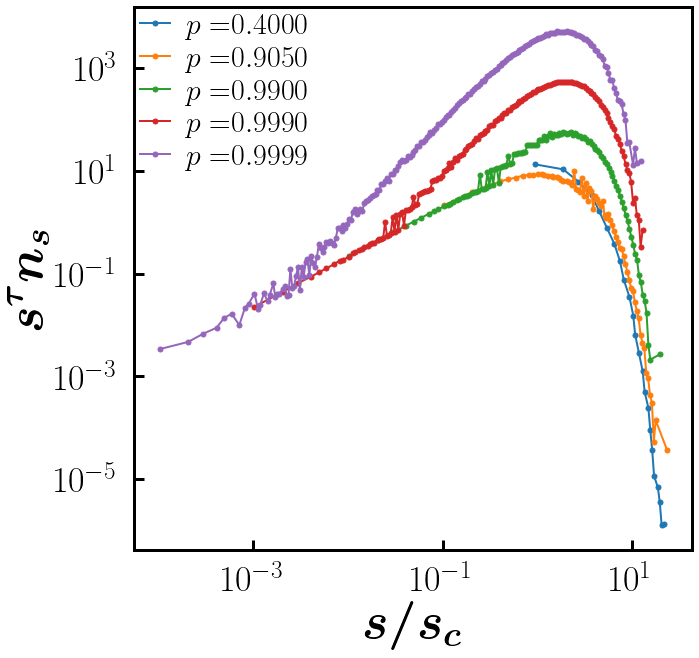

In [9]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotCSD_tau(prob, label=None, color=None):
    current = size, prob
    csd, dist = distLogBin(*clusterSizeDist[current], delta_exponent=0.02)
    dist *= np.power(csd, 2)
    csd /= -1.0/np.log(prob)
    label_name = label if label else latex_string("p=") + latex_float(prob, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)

plotCSD_tau(0.4)
plotCSD_tau(0.905)
plotCSD_tau(0.99)
plotCSD_tau(0.999)
plotCSD_tau(0.9999)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("s/s_{c}"))
ax.set_ylabel(latex_bold_string("s^{\\tau} n_s"))
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

fig.show()
